# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Convolutions, Blurring and Sharpening Images </h2>

<h5 style="margin-top:5px;">In this lesson, we'll learn to:</h5>

<p style="margin-top:0;">
1️⃣ Convolution Operations <br>
2️⃣ Blurring <br>
3️⃣ Denoising <br>
4️⃣ Sharpening <br>
</p>

In [1]:
# Our Setup, Import Libraries and Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Blurring using Convolutions** ###

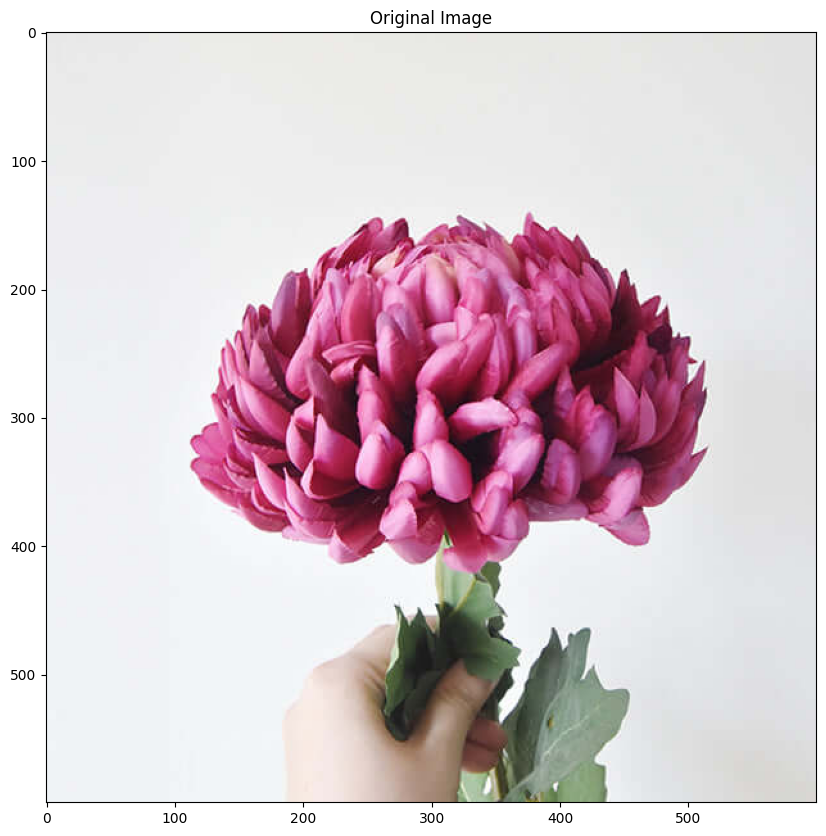

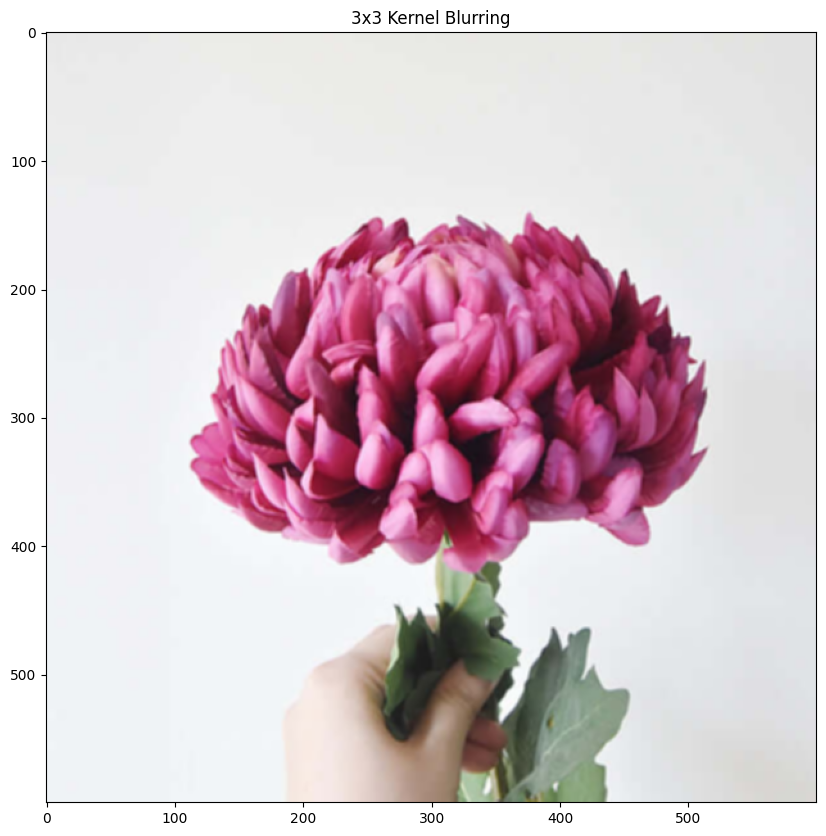

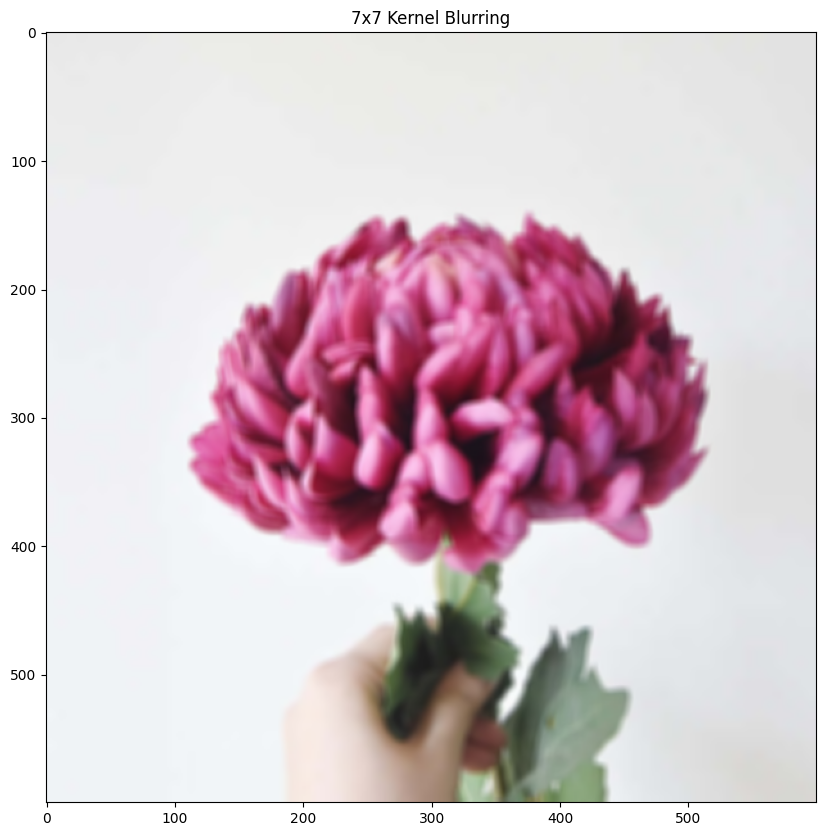

In [2]:
import cv2
import numpy as np

image = cv2.imread('images/flowers.jpg')
imshow("Original Image", image)

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.filter2D to convolve the kernel with an image
blurred = cv2.filter2D(image, -1, kernel_3x3)
imshow('3x3 Kernel Blurring', blurred)

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow('7x7 Kernel Blurring', blurred2)

### **Other commonly used blurring methods in OpenCV** ###
#### 1. Regular Blurring ####
#### 2. Gaussian Blurring ####
#### 3. Median Blurring ####

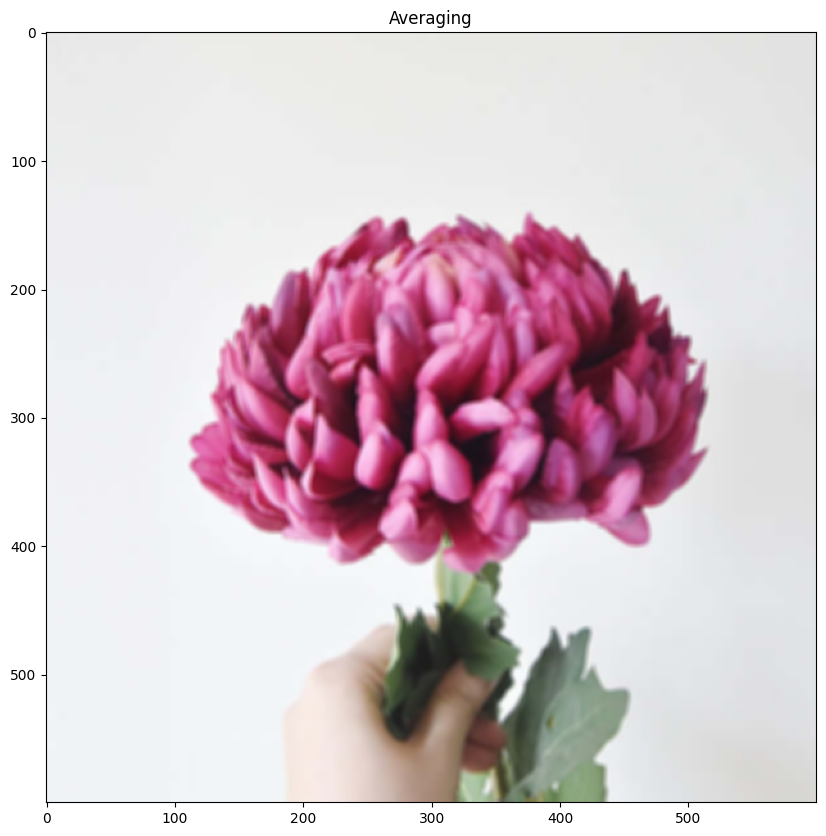

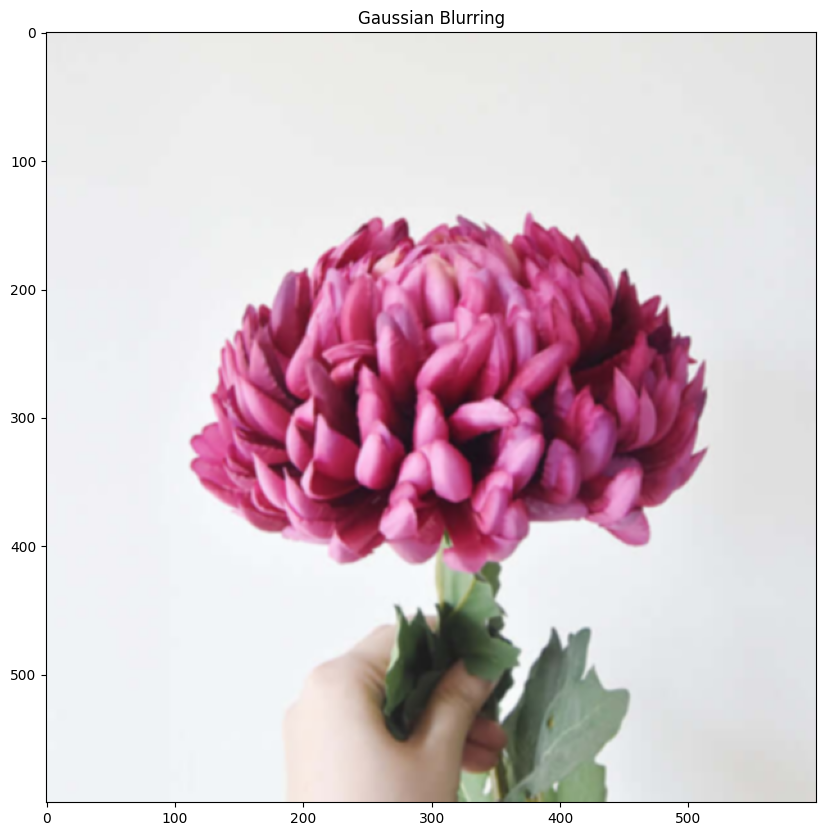

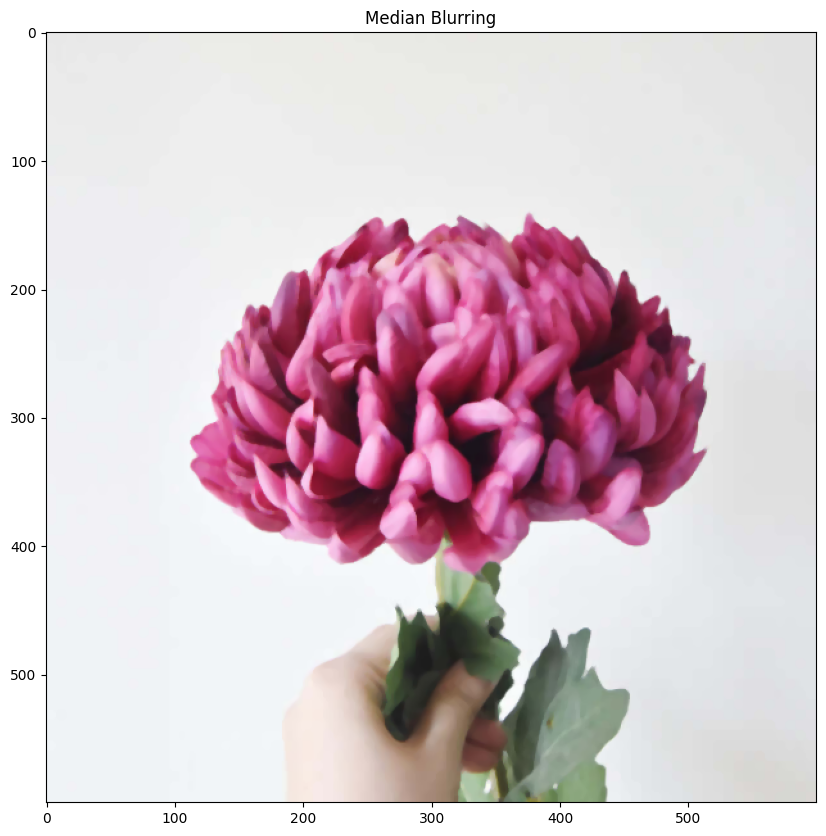

In [4]:
import cv2
import numpy as np

image = cv2.imread('images/flowers.jpg')

# Averaging done by convolving the image with a normalized box filter.
# This takes the pixels under the box and replaces the central element
# Box size needs to be odd and positive
blur = cv2.blur(image, (5,5))
imshow('Averaging', blur)

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(image, (5,5), 0)
imshow('Gaussian Blurring', Gaussian)

# Takes median of all the pixels under the kernel area and central
# element is replaced with this median value
median = cv2.medianBlur(image, 5)
imshow('Median Blurring', median)

### **Bilateral Filter** ###
### dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) ###

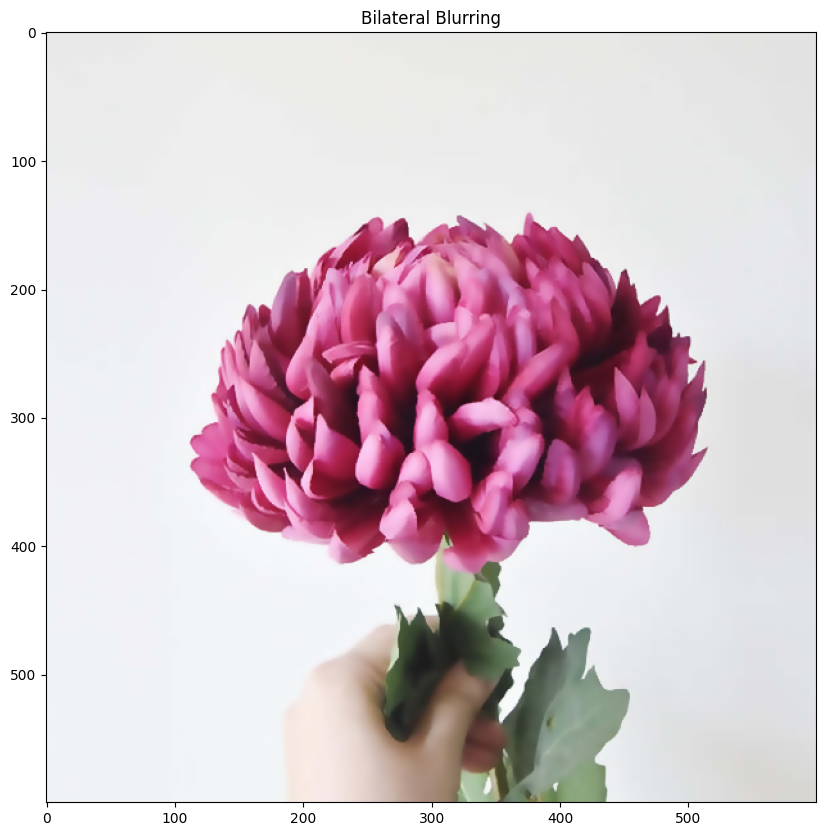

In [5]:
# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
imshow('Bilateral Blurring', bilateral)

### **Image De-noising - Non-Local Means Denoising** ###
#### 1. cv2.fastNlMeansDenoising() - works with a single grayscale images ####
#### 2. cv2.fastNlMeansDenoisingColored() - works with a color image ####
#### 3. cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images) ####
#### 4. cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images ####
#### fastNIMeansDenoisingColored(InputArray src, OutputArray dst, float h=3, float hColor=3, int templateWindowSize=7, int searchWindowSize=21) ####

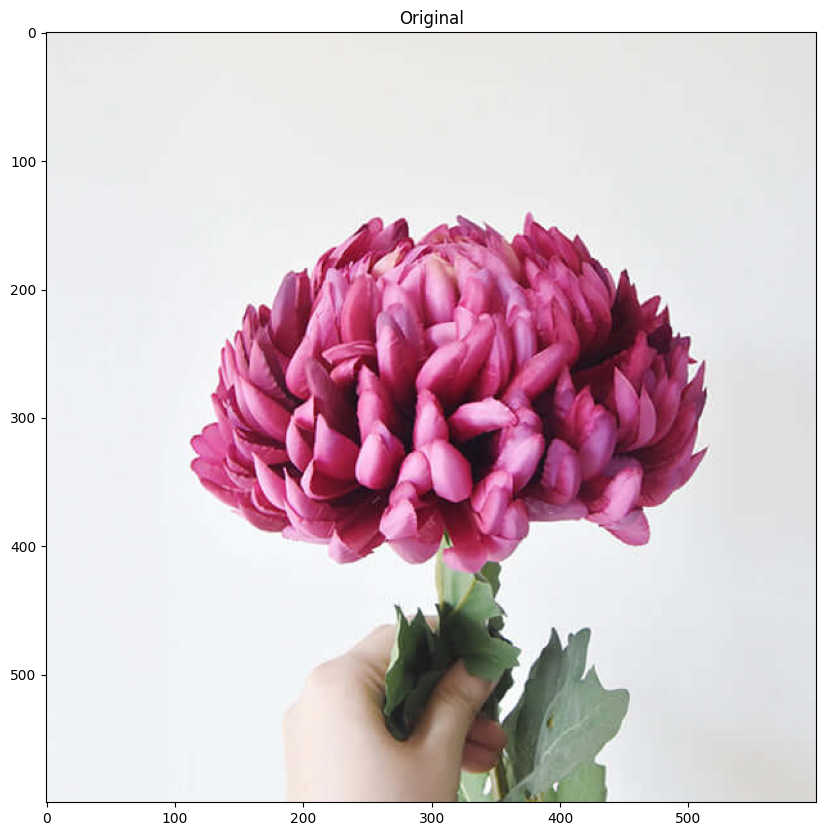

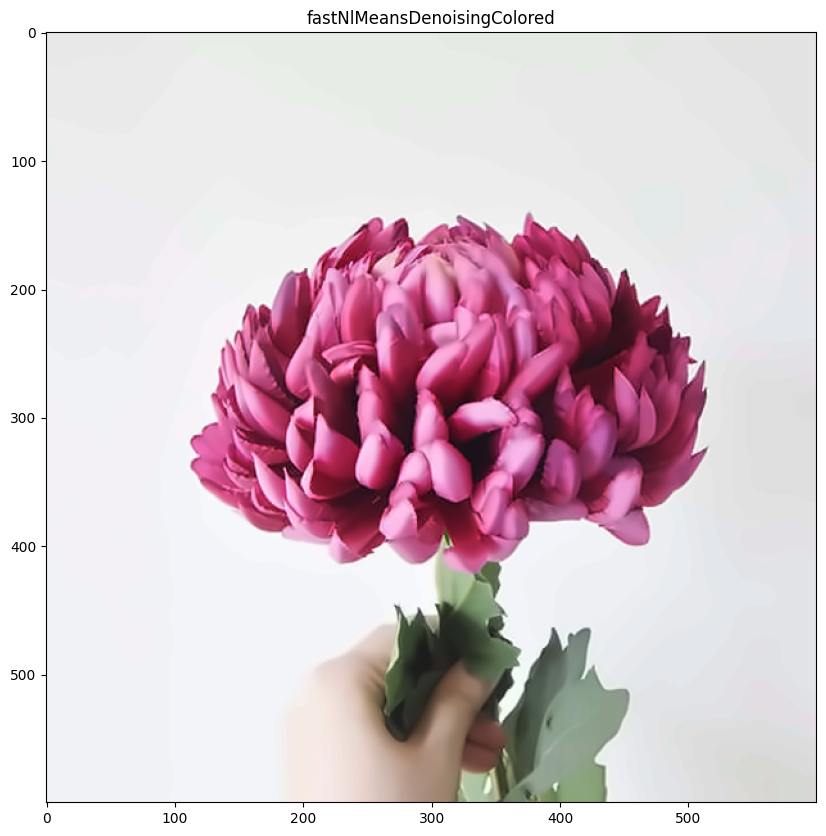

In [7]:
image = cv2.imread('images/flowers.jpg')
imshow('Original', image)

dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow('fastNlMeansDenoisingColored', dst)

### **Sharpening Images** ###

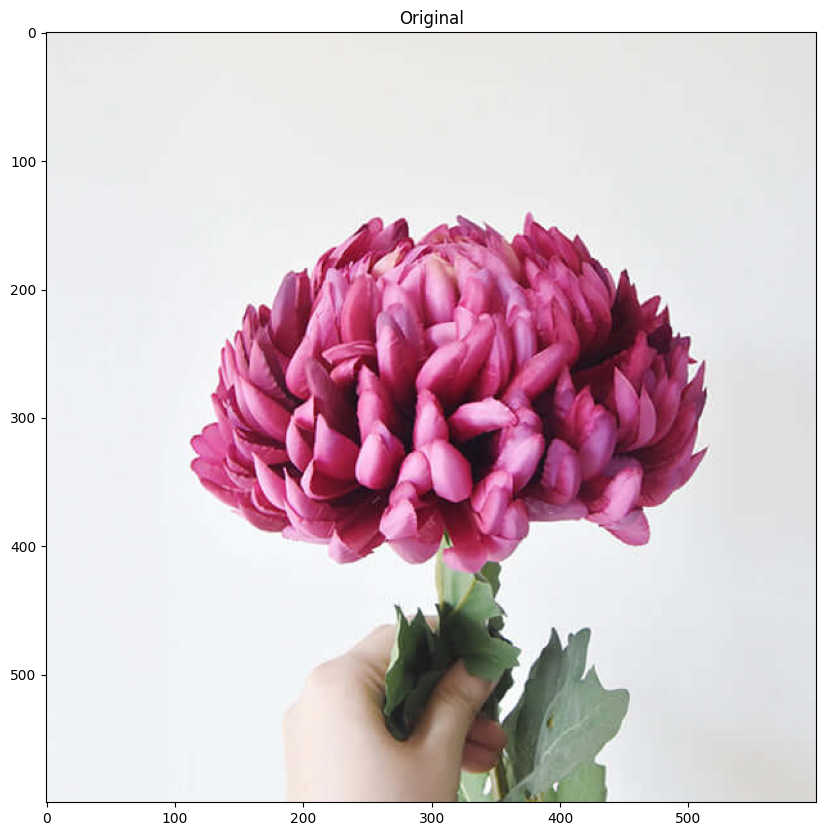

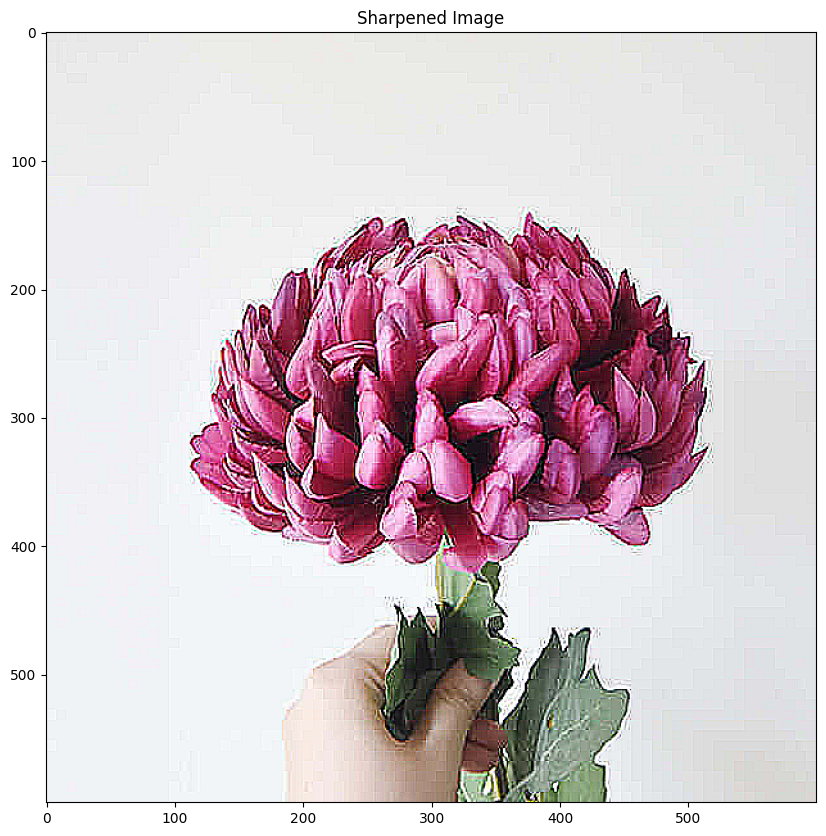

In [8]:
# Loading our image
image = cv2.imread('images/flowers.jpg')
imshow('Original', image)

# Create our sharpening kernel, remember it must sum to one
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]]) 
                             
# applying the sharpening kernel to the image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
imshow('Sharpened Image', sharpened)